<a href="https://colab.research.google.com/github/deon2502/COLAB/blob/main/5_29_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls '/content/drive/MyDrive/txt'

'(NEW)Good Dirt A Novel (Charmaine Wilkerson) (Z-Library).txt'
'(NEW)The Never List (Jade Presley) (Z-Library).txt'
'(NEW)When the World Fell Silent (Donna Jones Alward) (Z-Library).txt'


In [8]:
import nltk
nltk.download("popular")
nltk.download('all-corpora')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [11]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'can', "we've", 'does', 'all', "he'll", 'if', 'below', 'with', 'those', 'before', 'then', 'where', "hasn't", 'r', "don't", 'having', 'why', 'our', 'how', 'was', 'your', "hadn't", "doesn't", 'hers', 'down', 'com', 'ought', 'an', "wouldn't", "aren't", 'other', 'they', 'on', 'him', 'as', 'you', 'do', 'too', 'by', "you're", 'what', 'were', "they'd", 'when', 'again', 'hence', "how's", 'into', 'he', 'therefore', 'me', 'her', 'until', "we'll", 'these', 'my', 'ours', 'herself', 'it', "we're", 'cannot', "that's", 'yours', 'yourselves', 'himself', 'been', 'any', 'once', 'in', 'his', 'such', 'could', "let's", 'for', 'has', "they'll", 'to', 'between', 'would', "you'd", 'just', "he's", 'themselves', 'had', 'the', 'off', 'or', "she'd", 'at', 'while', 'up', 'http', "isn't", 'itself', 'not', 'each', "you'll", 'own', 'since', "didn't", 'out', 'them', 'a', 'only', 'like', 'than', 'after', 'under', "we'd", "there's", 'through', 'this', 'nor', 'few', 'about', 'did', 'very', 'otherwise', 'also', 'of', 'sa

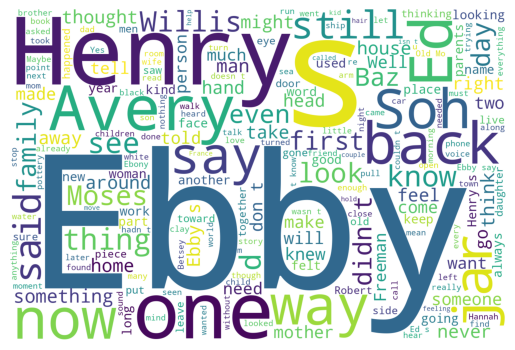

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

f = open('/content/drive/MyDrive/txt/(NEW)Good Dirt A Novel (Charmaine Wilkerson) (Z-Library).txt','r').read()

stop = ["people", "old people", "time", "life"] + list(STOPWORDS)

wordcloud = WordCloud(
    background_color="white",
    width=1500,
    height=1000,
    margin=2,
    stopwords=stop
).generate(f)


plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [15]:
import nltk

from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content/drive/MyDrive/txt'
wordlists = PlaintextCorpusReader(corpus_root, '.*') # *: all .txt

books = wordlists.fileids()
print(books)

['(NEW)Good Dirt A Novel (Charmaine Wilkerson) (Z-Library).txt', '(NEW)The Never List (Jade Presley) (Z-Library).txt', '(NEW)When the World Fell Silent (Donna Jones Alward) (Z-Library).txt']


(NEW)Good Dirt A Novel (Charmaine Wilkerson) (Z-Library).txt
(NEW)The Never List (Jade Presley) (Z-Library).txt
(NEW)When the World Fell Silent (Donna Jones Alward) (Z-Library).txt


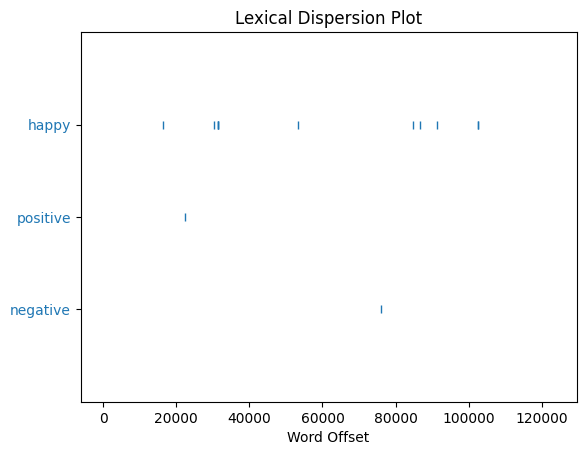

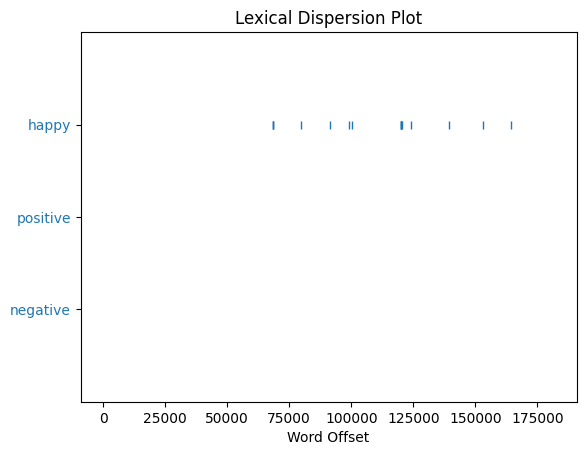

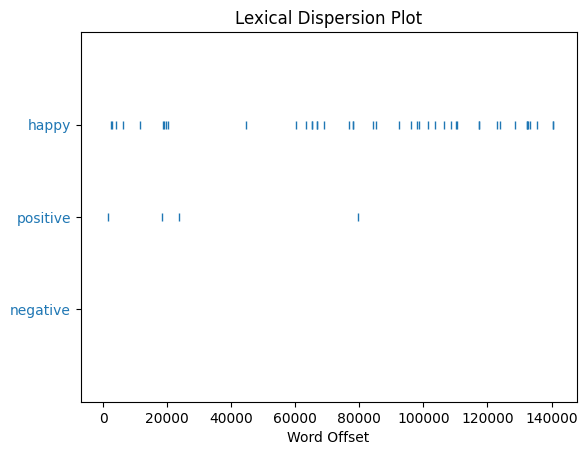

In [16]:
findList = ['happy', 'positive', 'negative' ]

for fileid in books:
   myWords = wordlists.words(fileid)
   myText = nltk.text.Text(myWords)
   print(fileid)
   myText.dispersion_plot(findList)

<Axes: xlabel='Samples', ylabel='Counts'>

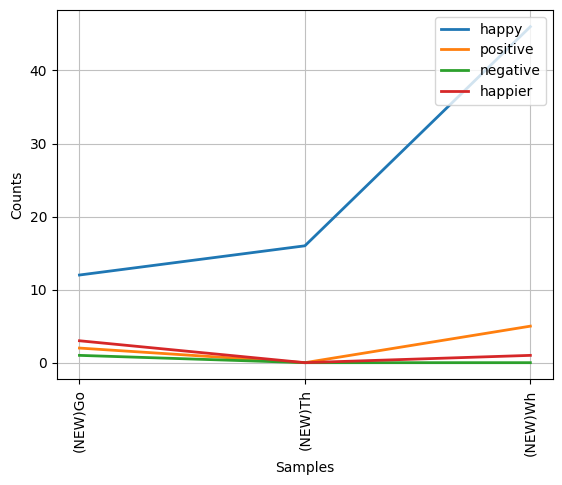

In [20]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:7])
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)

           for target in ['happy', 'positive', 'negative', 'happier']
           if w.lower().startswith(target))
cfd.plot()

<Axes: xlabel='Samples', ylabel='Counts'>

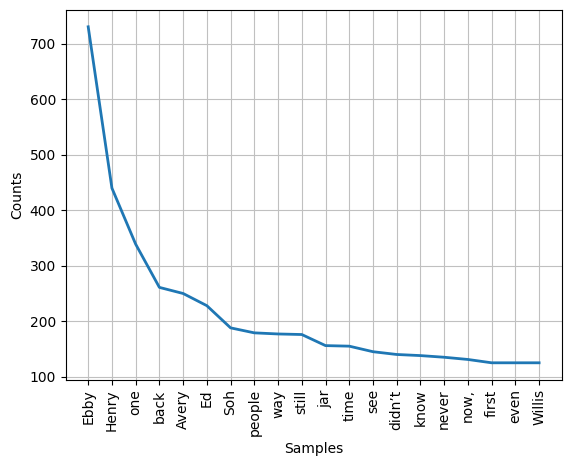

In [19]:
import nltk
from wordcloud import STOPWORDS

dataset = wordlists.raw('/content/drive/MyDrive/txt/(NEW)Good Dirt A Novel (Charmaine Wilkerson) (Z-Library).txt')

tokens = dataset.split(' ') #以空格斷詞
clean_tokens = tokens[:]

for token in tokens:
  if token.lower() in STOPWORDS:
    clean_tokens.remove(token)  #若有STOPWORDS,remove掉

freq = nltk.FreqDist(clean_tokens)

# for key,val in freq.items():
#  print (str(key) + ':' + str(val))
freq.plot(20,cumulative=False)